In [94]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
pwd


'C:\\Users\\anujj'

In [34]:
df = pd.read_excel('IPL Data set Assignment.xlsm')

In [36]:
df

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,7,1,0,0,0*,0.00,2,0.00,0,0,0,0
129,130,Arshdeep Singh,8,1,0,0,0*,0.00,3,0.00,0,0,0,0
130,131,Daniel Sams,3,1,0,0,0*,0.00,2,0.00,0,0,0,0
131,132,Shreevats Goswami,2,2,0,0,0*,0.00,4,0.00,0,0,0,0


Q4. Create a new column (Cleaned_Highest_score) based on Highest score variable. Remove the Asterik(*) mark and convert the data type into INT.

In [51]:


# Rename integer column names to strings
df.rename(columns={100: 'Centuries', 50: 'Half Centuries'}, inplace=True)

# Remove asterisks from 'Highest Score' and convert to int
df['Highest Score'] = df['Highest Score'].astype(str).str.replace('*', '', regex=False).astype(int)

# Convert numerical columns to appropriate data types
num_cols = ['Matches', 'Inns', 'Not Out', 'Runs', 'Avg', 'Balls faced', 'Strike rate', 'Centuries', 'Half Centuries', '4s', '6s']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Display dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Jersey No       133 non-null    int64  
 1   Player          133 non-null    object 
 2   Matches         133 non-null    int64  
 3   Inns            133 non-null    int64  
 4   Not Out         133 non-null    int64  
 5   Runs            133 non-null    int64  
 6   Highest Score   133 non-null    int32  
 7   Avg             133 non-null    float64
 8   Balls faced     133 non-null    int64  
 9   Strike rate     133 non-null    float64
 10  Centuries       133 non-null    int64  
 11  Half Centuries  133 non-null    int64  
 12  4s              133 non-null    int64  
 13  6s              133 non-null    int64  
dtypes: float64(2), int32(1), int64(10), object(1)
memory usage: 14.2+ KB


In [56]:
df

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,Centuries,Half Centuries,4s,6s
0,1,KL Rahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,7,1,0,0,0,0.00,2,0.00,0,0,0,0
129,130,Arshdeep Singh,8,1,0,0,0,0.00,3,0.00,0,0,0,0
130,131,Daniel Sams,3,1,0,0,0,0.00,2,0.00,0,0,0,0
131,132,Shreevats Goswami,2,2,0,0,0,0.00,4,0.00,0,0,0,0


Q1. What is the maximum number of matches played by an individual player in a season? Print the player name along with the number of matched played

In [155]:
# Find the maximum number of matches played
max_matches = df['Matches'].max()

# Find the player(s) who played the maximum number of matches
players_with_max_matches = df[df['Matches'] == max_matches]['Player']

players_with_max_matches

1     Shikhar Dhawan
3       Shreyas Iyer
19    Marcus Stoinis
67     Kagiso Rabada
Name: Player, dtype: object

Q2. Top 2 players with maximum Average who have scored atleast 2 half centuries ?

In [157]:
# Filter players who have scored at least 2 half-centuries (50s)
filtered_df = df[df['Half Centuries'] >= 2]

# Sort the filtered DataFrame by 'Avg' in descending order
top_players = filtered_df.sort_values(by='Avg', ascending=False)

# Select the top 2 players
top_2_players = top_players.head(2)
top_2_players

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,Centuries,Half Centuries,4s,6s,First Name,Last Name,Runs from 4s and 6s,Percentage of runs from 4s and 6s,Not Out Percentage
36,37,Wriddhiman Saha,4,4,1,214,87,71.33,153,139.86,0,2,24,5,Wriddhiman,Saha,126,58.878505,25.000000
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan,324,62.790698,30.769231


Q3. Create 2 new columns based on Player name. First column will have first name and second column will have last name. Eg: for the player Shikhar Dhawan, Shikhar will be the first name and Dhawan will be the last name.

In [80]:
# Split the 'Player' column and handle cases with only one name
split_names = df['Player'].str.split(' ', expand=True)

# Assign the first name
df['First Name'] = split_names[0]

# Assign the last name, filling NaN for single names
df['Last Name'] = split_names[1]

# Print the updated DataFrame
df

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,Centuries,Half Centuries,4s,6s,First Name,Last Name
0,1,KL Rahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23,KL,Rahul
1,2,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan
2,3,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14,David,Warner
3,4,Shreyas Iyer,17,17,2,519,88,34.60,421,123.27,0,3,40,16,Shreyas,Iyer
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,Khaleel Ahmed,7,1,0,0,0,0.00,2,0.00,0,0,0,0,Khaleel,Ahmed
129,130,Arshdeep Singh,8,1,0,0,0,0.00,3,0.00,0,0,0,0,Arshdeep,Singh
130,131,Daniel Sams,3,1,0,0,0,0.00,2,0.00,0,0,0,0,Daniel,Sams
131,132,Shreevats Goswami,2,2,0,0,0,0.00,4,0.00,0,0,0,0,Shreevats,Goswami


Q5. Print the total number of centuries scored in the entire season.

In [160]:
# Calculate the total number of centuries
total_centuries = df['Centuries'].sum()

total_centuries

5

Q6. Print all the player names whose strike rate is less than the average strike rate of all players in entire season. Print the player name, his strike rate and average strike rate.

In [162]:
# Calculate the average strike rate
average_strike_rate = df['Strike rate'].mean()

# Filter players with strike rate less than the average
players_below_average = df[df['Strike rate'] < average_strike_rate]

players_below_average

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,Centuries,Half Centuries,4s,6s,First Name,Last Name,Runs from 4s and 6s,Percentage of runs from 4s and 6s,Not Out Percentage
51,52,Ajinkya Rahane,9,8,0,113,60,14.12,107,105.60,0,1,12,2,Ajinkya,Rahane,60,53.097345,0.000000
55,56,Glenn Maxwell,13,11,4,108,32,15.42,106,101.88,0,0,9,0,Glenn,Maxwell,36,33.333333,36.363636
58,59,Vijay Shankar,7,5,1,97,52,24.25,96,101.04,0,1,10,1,Vijay,Shankar,46,47.422680,20.000000
61,62,Josh Philippe,5,5,1,78,33,19.50,77,101.29,0,0,9,1,Josh,Philippe,42,53.846154,20.000000
62,63,Gurkeerat Singh,8,5,5,71,21,0.00,80,88.75,0,0,8,0,Gurkeerat,Singh,32,45.070423,100.000000
65,66,Kedar Jadhav,8,5,2,62,26,20.66,66,93.93,0,0,7,0,Kedar,Jadhav,28,45.161290,40.000000
70,71,Yashasvi Jaiswal,3,3,0,40,34,13.33,44,90.90,0,0,2,2,Yashasvi,Jaiswal,20,50.000000,0.000000
71,72,Shreyas Gopal,14,5,1,37,23,9.25,39,94.87,0,0,3,0,Shreyas,Gopal,12,32.432432,20.000000
77,78,Murali Vijay,3,3,0,32,21,10.66,43,74.41,0,0,4,0,Murali,Vijay,16,50.000000,0.000000
79,80,Chris Jordan,9,5,2,29,13,9.66,31,93.54,0,0,2,0,Chris,Jordan,8,27.586207,40.000000


Q7. Please check the correlation between the features and create a heat map

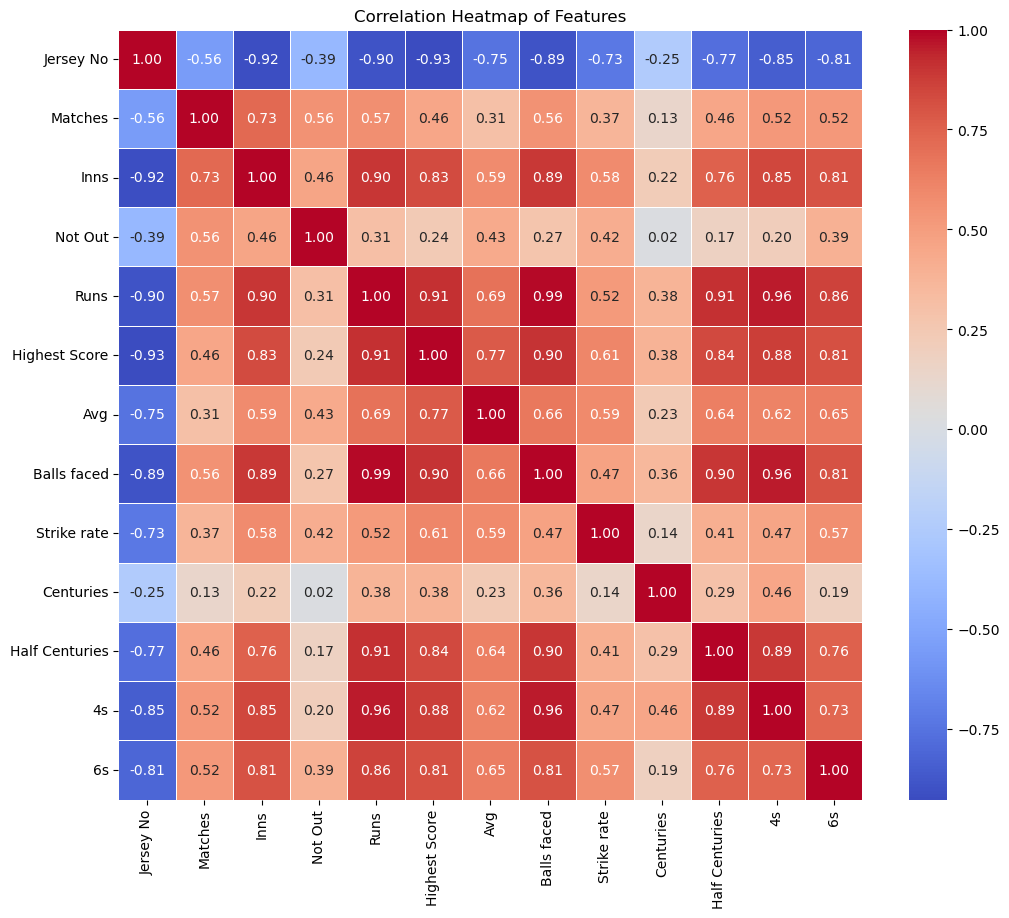

In [96]:
# Select numerical columns for correlation
numerical_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

Q8. Check the list of players who has an average greater than 50 as well strike rate above 120. Print player name, average and strike rate.

In [166]:
# Filter players with average > 50 and strike rate > 120
filtered_players1 = df[(df['Avg'] > 50) & (df['Strike rate'] > 120)]

filtered_players1

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,Centuries,Half Centuries,4s,6s,First Name,Last Name,Runs from 4s and 6s,Percentage of runs from 4s and 6s,Not Out Percentage
0,1,KL Rahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23,KL,Rahul,370,55.223881,14.285714
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan,324,62.790698,30.769231
31,32,Kieron Pollard,16,12,7,268,60,53.60,140,191.42,0,1,15,22,Kieron,Pollard,192,71.641791,58.333333
36,37,Wriddhiman Saha,4,4,1,214,87,71.33,153,139.86,0,2,24,5,Wriddhiman,Saha,126,58.878505,25.000000
37,38,Ruturaj Gaikwad,6,6,2,204,72,51.00,169,120.71,0,3,16,6,Ruturaj,Gaikwad,100,49.019608,33.333333
57,58,Deepak Hooda,7,5,4,101,62,101.00,71,142.25,0,1,5,5,Deepak,Hooda,50,49.504950,80.000000
60,61,Tom Curran,5,4,3,83,54,83.00,62,133.87,0,1,5,3,Tom,Curran,38,45.783133,75.000000


Q9. Please check the list of players who has an average greater than 40 and balls faced above 100. Print player name, average and balls faced.



In [168]:
# Filter players with average > 40 and balls faced > 100
filtered_players2 = df[(df['Avg'] > 40) & (df['Balls faced'] > 100)]

filtered_players2

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,Centuries,Half Centuries,4s,6s,First Name,Last Name,Runs from 4s and 6s,Percentage of runs from 4s and 6s,Not Out Percentage
0,1,KL Rahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23,KL,Rahul,370,55.223881,14.285714
1,2,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan,340,55.016181,17.647059
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan,324,62.790698,30.769231
8,9,Virat Kohli,15,15,4,466,90,42.36,384,121.35,0,3,23,11,Virat,Kohli,158,33.905579,26.666667
9,10,ABD Villiers,15,14,4,454,73,45.40,286,158.74,0,5,33,23,ABD,Villiers,270,59.471366,28.571429
10,11,Faf Duplessis,13,13,2,449,87,40.81,319,140.75,0,4,42,14,Faf,Duplessis,252,56.124722,15.384615
14,15,Eoin Morgan,14,14,4,418,68,41.80,302,138.41,0,1,32,24,Eoin,Morgan,272,65.071770,28.571429
24,25,Kane Williamson,12,11,4,317,67,45.28,237,133.75,0,3,26,10,Kane,Williamson,164,51.735016,36.363636
27,28,Chris Gayle,7,7,0,288,99,41.14,210,137.14,0,3,15,23,Chris,Gayle,198,68.750000,0.000000
28,29,Ben Stokes,8,8,1,285,107,40.71,200,142.50,1,1,36,7,Ben,Stokes,186,65.263158,12.500000


Q10. Players who scored atleast one century in this season. Create visualization.

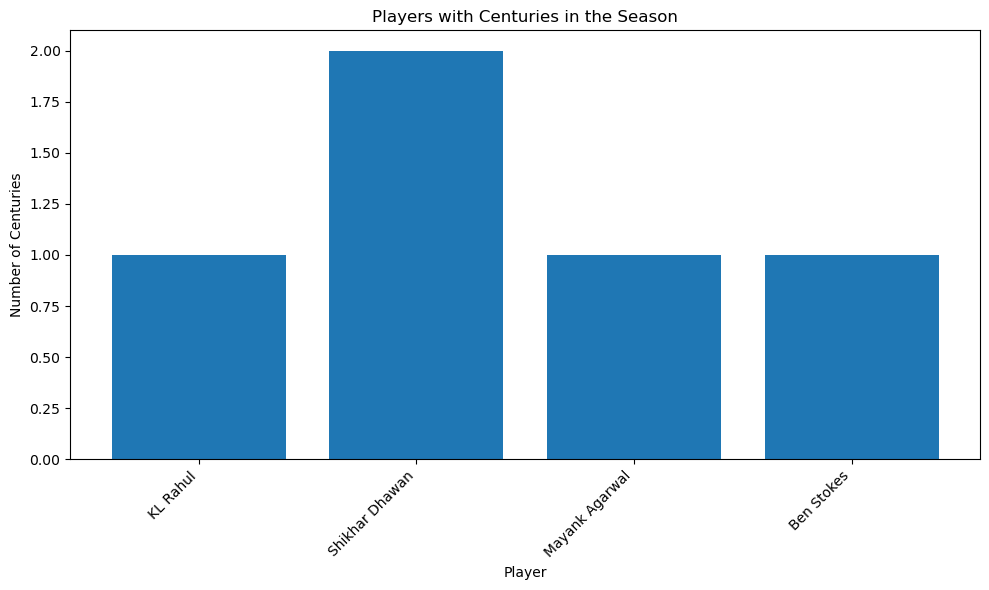

In [107]:
# Filter players who scored at least one century
centurions = df[df['Centuries'] > 0]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(centurions['Player'], centurions['Centuries'])
plt.xlabel('Player')
plt.ylabel('Number of Centuries')
plt.title('Players with Centuries in the Season')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

Q11. Players who scored atleast 4 half centuries in this season.

In [170]:
# Filter players who scored at least 4 half-centuries
half_centurions = df[df['Half Centuries'] >= 4]

half_centurions

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,Centuries,Half Centuries,4s,6s,First Name,Last Name,Runs from 4s and 6s,Percentage of runs from 4s and 6s,Not Out Percentage
0,1,KL Rahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23,KL,Rahul,370,55.223881,14.285714
1,2,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan,340,55.016181,17.647059
2,3,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14,David,Warner,292,53.284672,12.500000
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan,324,62.790698,30.769231
5,6,Quinton Kock,16,16,2,503,78,35.92,358,140.50,0,4,46,22,Quinton,Kock,316,62.823062,12.500000
6,7,Suryakumar Yadav,16,15,3,480,79,40.00,331,145.01,0,4,61,11,Suryakumar,Yadav,310,64.583333,20.000000
7,8,Devdutt Padikkal,15,15,0,473,74,31.53,379,124.80,0,5,51,8,Devdutt,Padikkal,252,53.276956,0.000000
9,10,ABD Villiers,15,14,4,454,73,45.40,286,158.74,0,5,33,23,ABD,Villiers,270,59.471366,28.571429
10,11,Faf Duplessis,13,13,2,449,87,40.81,319,140.75,0,4,42,14,Faf,Duplessis,252,56.124722,15.384615


Q12. Check the list of players who hit more than 45 boundaries and more than 10 sixes in this season.

In [172]:
# Filter players with more than 45 boundaries (4s) and more than 10 sixes (6s)
filtered_players3 = df[(df['4s'] > 45) & (df['6s'] > 10)]

filtered_players3

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,Centuries,Half Centuries,4s,6s,First Name,Last Name,Runs from 4s and 6s,Percentage of runs from 4s and 6s,Not Out Percentage
0,1,KL Rahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23,KL,Rahul,370,55.223881,14.285714
1,2,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan,340,55.016181,17.647059
2,3,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14,David,Warner,292,53.284672,12.500000
5,6,Quinton Kock,16,16,2,503,78,35.92,358,140.50,0,4,46,22,Quinton,Kock,316,62.823062,12.500000
6,7,Suryakumar Yadav,16,15,3,480,79,40.00,331,145.01,0,4,61,11,Suryakumar,Yadav,310,64.583333,20.000000


Q13. Plot a histogram of number of matches played in a season by players.

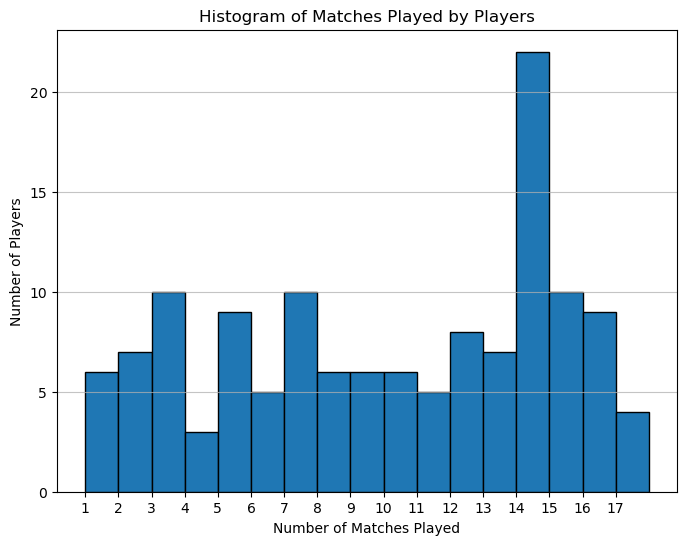

In [118]:
# Create a histogram of the 'Matches' column
plt.figure(figsize=(8, 6))
plt.hist(df['Matches'], bins=range(min(df['Matches']), max(df['Matches']) + 2), edgecolor='black')  # Create bins for each unique value
plt.xlabel('Number of Matches Played')
plt.ylabel('Number of Players')
plt.title('Histogram of Matches Played by Players')
plt.xticks(range(min(df['Matches']), max(df['Matches']) + 1))  # Set x-axis ticks to match the bins
plt.grid(axis='y', alpha=0.75)  # Add grid lines
plt.show()

Q14. Plot the histogram of balls faced by players.

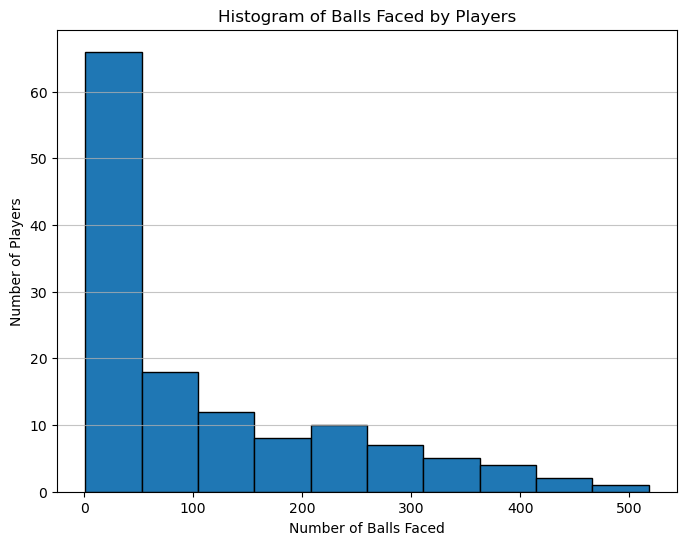

In [121]:
# Create a histogram of the 'Balls faced' column
plt.figure(figsize=(8, 6))
plt.hist(df['Balls faced'], bins=10, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('Number of Balls Faced')
plt.ylabel('Number of Players')
plt.title('Histogram of Balls Faced by Players')
plt.grid(axis='y', alpha=0.75)  # Add grid lines
plt.show()

Q15. Top 10 players with most runs in a season.

In [175]:
# Sort players by runs in descending order and get the top 10
top_10_players = df.sort_values(by='Runs', ascending=False).head(10)

top_10_players

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,Centuries,Half Centuries,4s,6s,First Name,Last Name,Runs from 4s and 6s,Percentage of runs from 4s and 6s,Not Out Percentage
0,1,KL Rahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23,KL,Rahul,370,55.223881,14.285714
1,2,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12,Shikhar,Dhawan,340,55.016181,17.647059
2,3,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14,David,Warner,292,53.284672,12.500000
3,4,Shreyas Iyer,17,17,2,519,88,34.60,421,123.27,0,3,40,16,Shreyas,Iyer,256,49.325626,11.764706
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,Ishan,Kishan,324,62.790698,30.769231
5,6,Quinton Kock,16,16,2,503,78,35.92,358,140.50,0,4,46,22,Quinton,Kock,316,62.823062,12.500000
6,7,Suryakumar Yadav,16,15,3,480,79,40.00,331,145.01,0,4,61,11,Suryakumar,Yadav,310,64.583333,20.000000
7,8,Devdutt Padikkal,15,15,0,473,74,31.53,379,124.80,0,5,51,8,Devdutt,Padikkal,252,53.276956,0.000000
8,9,Virat Kohli,15,15,4,466,90,42.36,384,121.35,0,3,23,11,Virat,Kohli,158,33.905579,26.666667
9,10,ABD Villiers,15,14,4,454,73,45.40,286,158.74,0,5,33,23,ABD,Villiers,270,59.471366,28.571429


Q16. Print the players who played the match but didn't get the batting.

In [131]:
# Filter players who played matches but didn't get to bat (Inns = 0)
players_no_batting = df[df['Inns'] == 0]

# Print the results
if not players_no_batting.empty:
    print("Players who played matches but didn't get to bat:")
    for index, row in players_no_batting.iterrows():
        print(f"Player: {row['Player']}")
else:
    print("All players got to bat in at least one inning.")

All players got to bat in at least one inning.


Q17. Create a new column to show the percentage of total runs scored in 4s and 6s. Then print the top 5 players with maximum percentage

In [180]:
# Calculate runs scored from 4s and 6s
df['Runs from 4s and 6s'] = (df['4s'] * 4) + (df['6s'] * 6)

# Calculate the percentage of runs scored in 4s and 6s
df['Percentage of runs from 4s and 6s'] = (df['Runs from 4s and 6s'] / df['Runs']) * 100


# Sort players by the percentage in descending order and get the top 5
top_5_players_run = df.sort_values(by='Percentage of runs from 4s and 6s', ascending=False).head(5)

top_5_players_run

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,Centuries,Half Centuries,4s,6s,First Name,Last Name,Runs from 4s and 6s,Percentage of runs from 4s and 6s,Not Out Percentage
109,110,Andrew Tye,1,1,0,6,6,6.00,6,100.00,0,0,0,1,Andrew,Tye,6,100.000000,0.000000
48,49,Andre Russell,10,9,0,117,25,13.00,81,144.44,0,0,9,9,Andre,Russell,90,76.923077,0.000000
74,75,Chris Morris,9,5,1,34,25,8.50,21,161.90,0,0,2,3,Chris,Morris,26,76.470588,20.000000
29,30,Hardik Pandya,14,13,5,281,60,35.12,157,178.98,0,1,14,25,Hardik,Pandya,206,73.309609,38.461538
47,48,Sunil Narine,10,9,0,121,64,13.44,85,142.35,0,1,10,8,Sunil,Narine,88,72.727273,0.000000


Q18. Print the players with top 5 Not out percentages (Not Out percentage can be calculated as number of Not outs divided by Innings).

In [182]:
# Calculate the Not Out percentage
df['Not Out Percentage'] = (df['Not Out'] / df['Inns']) * 100

# Sort players by the Not Out percentage in descending order and get the top 5
top_5_players_notOut = df.sort_values(by='Not Out Percentage', ascending=False).head(5)

top_5_players_notOut

,Jersey No,Player,Matches,Inns,Not Out,Runs,Highest Score,Avg,Balls faced,Strike rate,Centuries,Half Centuries,4s,6s,First Name,Last Name,Runs from 4s and 6s,Percentage of runs from 4s and 6s,Not Out Percentage
122,123,Shahbaz Ahmed,2,1,1,1,1,0.0,1,100.0,0,0,0,0,Shahbaz,Ahmed,0,0.000000,100.0
97,98,Mohammad Nabi,1,1,1,11,11,0.0,8,137.5,0,0,2,0,Mohammad,Nabi,8,72.727273,100.0
114,115,T Natarajan,16,3,3,3,3,0.0,5,60.0,0,0,0,0,T,Natarajan,0,0.000000,100.0
116,117,Rahul Chahar,15,1,1,2,2,0.0,4,50.0,0,0,0,0,Rahul,Chahar,0,0.000000,100.0
113,114,Dhawal Kulkarni,1,1,1,3,3,0.0,2,150.0,0,0,0,0,Dhawal,Kulkarni,0,0.000000,100.0


Q19. Create visualization of top 10 players with highest number of sixes.

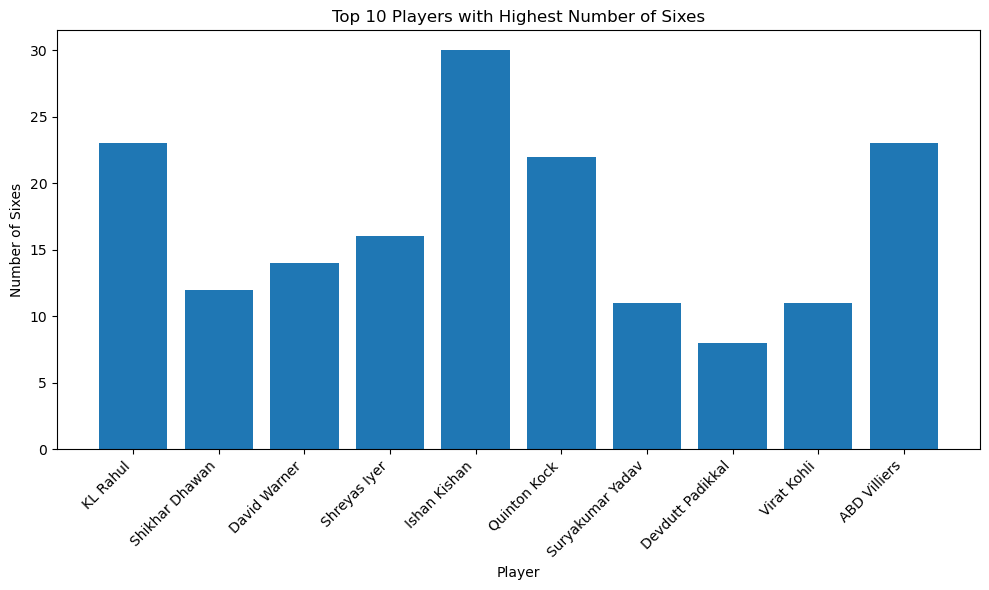

In [184]:
# Sort players by the number of sixes in descending order and get the top 10
top_10_players_6s = df.sort_values(by='6s', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_players['Player'], top_10_players['6s'])
plt.xlabel('Player')
plt.ylabel('Number of Sixes')
plt.title('Top 10 Players with Highest Number of Sixes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

Q20. Scatter plot of runs scored by a player v/s balls faced in a season. Then find the relationship between these 2 variables

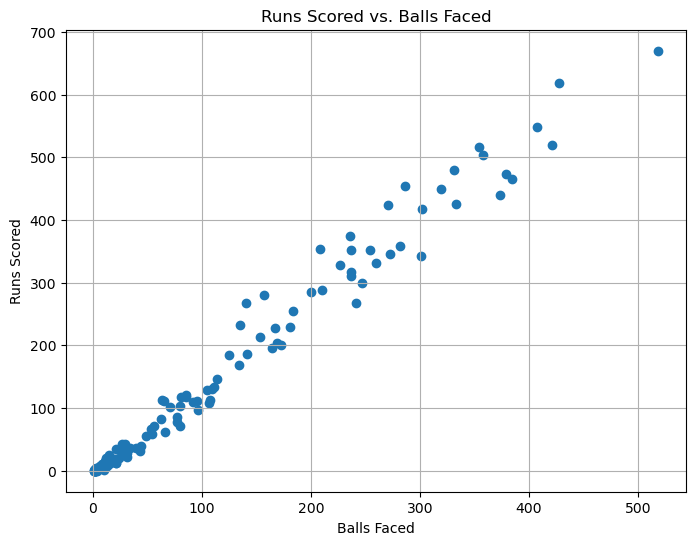

In [149]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Balls faced'], df['Runs'])
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.title('Runs Scored vs. Balls Faced')
plt.grid(True)
plt.show()


In [186]:

# Find the relationship using correlation
correlation = df['Runs'].corr(df['Balls faced'])
correlation

0.9899480233860845

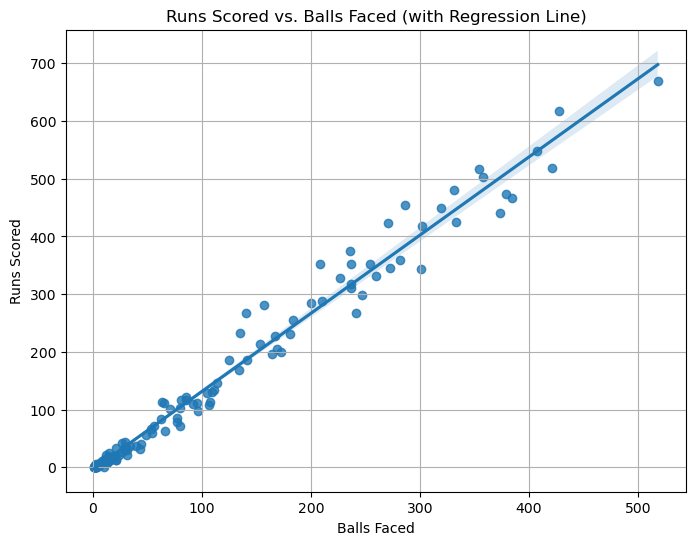

In [153]:

# Optional: Use seaborn for a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Balls faced', y='Runs', data=df)
plt.xlabel('Balls Faced')
plt.ylabel('Runs Scored')
plt.title('Runs Scored vs. Balls Faced (with Regression Line)')
plt.grid(True)
plt.show()